In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [12]:
X=df.drop('FWI', axis=1)
y=df['FWI']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<AxesSubplot: >

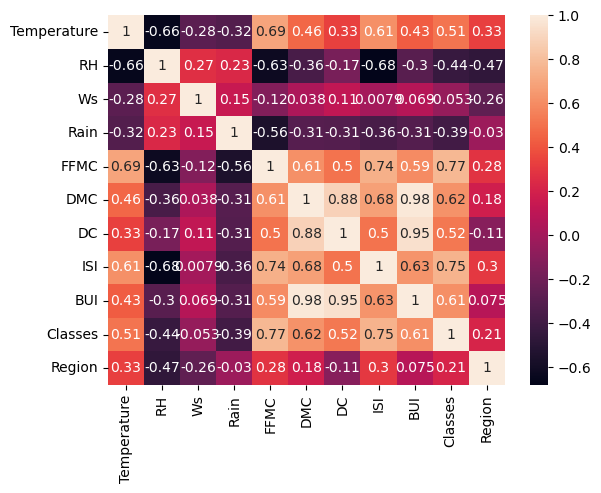

In [15]:
sns.heatmap(X_train.corr(), annot=True)

In [24]:
corr=X_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.660341,-0.283116,-0.318560,0.692966,0.462077,0.333289,0.612724,0.428393,0.511902,0.327961
RH,-0.660341,1.000000,0.266720,0.232825,-0.627611,-0.360693,-0.167639,-0.680750,-0.299635,-0.435774,-0.467454
Ws,-0.283116,0.266720,1.000000,0.146309,-0.124295,0.038133,0.114276,0.007881,0.069373,-0.052849,-0.261802
Rain,-0.318560,0.232825,0.146309,1.000000,-0.555787,-0.305372,-0.309095,-0.360759,-0.312724,-0.387598,-0.029514
FFMC,0.692966,-0.627611,-0.124295,-0.555787,1.000000,0.614962,0.502234,0.741444,0.592986,0.771525,0.282539
DMC,0.462077,-0.360693,0.038133,-0.305372,0.614962,1.000000,0.884854,0.677389,0.984411,0.622708,0.181701
DC,0.333289,-0.167639,0.114276,-0.309095,0.502234,0.884854,1.000000,0.501378,0.951105,0.522806,-0.109327
ISI,0.612724,-0.680750,0.007881,-0.360759,0.741444,0.677389,0.501378,1.000000,0.630070,0.750613,0.303760
BUI,0.428393,-0.299635,0.069373,-0.312724,0.592986,0.984411,0.951105,0.630070,1.000000,0.606180,0.075005
Classes,0.511902,-0.435774,-0.052849,-0.387598,0.771525,0.622708,0.522806,0.750613,0.606180,1.000000,0.214731


In [25]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [26]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [27]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

## Feature scaling or Standardization:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.13849763,  0.46141047, -0.48926543, ..., -0.90354364,
        -1.14183951, -1.05654109],
       [-0.40953601,  1.11088229,  0.98257438, ..., -0.07764828,
         0.87577982, -1.05654109],
       [-1.7647279 ,  1.24077665,  0.24665447, ..., -1.08707594,
        -1.14183951, -1.05654109],
       ...,
       [ 0.13254075,  0.98098792, -0.48926543, ..., -0.55942057,
        -1.14183951, -1.05654109],
       [ 0.94565588, -1.81174088, -0.85722538, ...,  0.90883784,
         0.87577982,  0.94648472],
       [ 0.94565588, -0.51279725,  0.24665447, ...,  1.23001937,
         0.87577982, -1.05654109]])

## Box plots to see effect of scaling

/tmp/ipykernel_1517/2104115701.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'X_train after scaling')

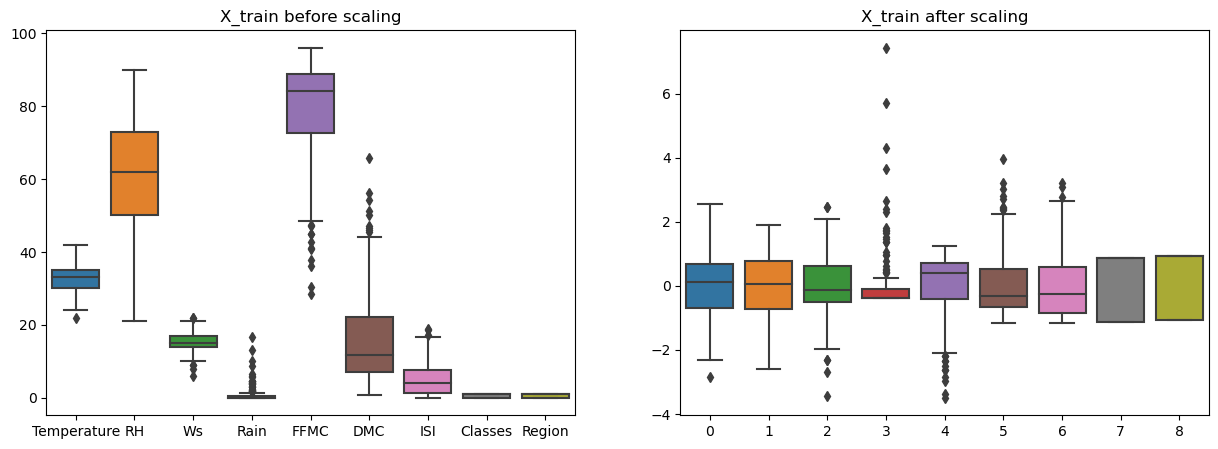

In [35]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')

plt.subplot(122)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

## Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Errro : ",mae)
print("R2 Score : ",score)

Mean Absolute Errro :  0.6993131278959999
R2 Score :  0.9732133545455117


## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Errro : ",mae)
print("R2 Score : ",score)

Mean Absolute Errro :  1.093671954651508
R2 Score :  0.9415307006848218


## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Errro : ",mae)
print("R2 Score : ",score)

Mean Absolute Errro :  0.6993131278959999
R2 Score :  0.9732133545455117


In [46]:
import pickle
pickle.dump(scaler,open('std_scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))